**Retail Data Analysis**

https://towardsdatascience.com/retail-data-analytics-1391284ec7b8

In This notebook I want to performa a Retail Data Analysis to developer a forecat model for sales using diferente machine learning algorithms. 


**Problem Definition**

The goal of this project is to predict the department wide weekly sales for a store. This should then help to optimize the manufacturing process and therefore to increase income while lowering costs. It should be possible to feed in past sales data from a department and to get the predicted weekly sales.

**Evaluation Metrics**

The target data are weekly sales amount, so it's numerical data. Therefore, root mean squared error (RMSE) can be used in order to get the best performing machine learning technique. In order to get a better understanding of the scale of RMSE, the normalized RMSE can be used. The normalized RMSE is computed by dividing the RMSE by the standard deviation of the target variable. Equation 1 shows the formula for computing the RMSE.

Additionally, the R-Squared score can be used. The R-Squared score represents the percentage of variance a model can represent. The R-Squared score computes the squared error of each point divided by the “dummy” estimator error, which is only predicting the mean of all target variables. Equation 2 shows the formula for computing R-Squared.



![Equation 1: RMSE](https://miro.medium.com/max/662/1*9r_YtpJyrv3IE95dsnS22g.png)

Root Mean Squared Error


![R-Squared Equation](https://miro.medium.com/max/568/1*1KmqhgnCunf9hIIyCOGHWw.png)

R-Squared Equation

**Enviroment Setup**

In [ ]:
# install opendatasets
!pip install opendatasets

In [ ]:
# import libs
import pandas as pd
import numpy as np
import os
import sys
import json
import seaborn as sns
import matplotlib.pyplot as plt
import opendatasets as od

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.style.use('seaborn')

##**Data Import**

The datasets used for this projetc is from [Kaggle](https://www.kaggle.com/manjeetsingh/retaildataset) Ratail data Analytics competition. It's contains data for 45 stores located in diferent regions, each store divided into departments.

In [ ]:
# download datsets form kaggle
od.download("https://www.kaggle.com/manjeetsingh/retaildataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: orlaede
Your Kaggle Key: ··········


100%|██████████| 3.11M/3.11M [00:00<00:00, 204MB/s]

In [ ]:
%ls -l retaildataset/

total 13548
-rw-r--r-- 1 root root   600478 Aug  2 12:18 'Features data set.csv'
-rw-r--r-- 1 root root 13264115 Aug  2 12:18 'sales data-set.csv'
-rw-r--r-- 1 root root      577 Aug  2 12:18 'stores data-set.csv'


In [ ]:
# change files names
!mv ./retaildataset/Features\ data\ set.csv ./retaildataset/features_data_set.csv
!mv ./retaildataset/sales\ data-set.csv ./retaildataset/sales_data_set.csv
!mv ./retaildataset/stores\ data-set.csv ./retaildataset/stores_data_set.csv

In [ ]:
# data import
features_df = pd.read_csv("retaildataset/features_data_set.csv")
sales_df = pd.read_csv("retaildataset/sales_data_set.csv")
stores_df = pd.read_csv("retaildataset/stores_data_set.csv")

**Checking Dataframes**

In [ ]:
features_df.head(3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False


In [ ]:
sales_df.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False


In [ ]:
# convert date column to pandas datetime format
features_df['Date'] = pd.to_datetime(features_df['Date'], format='%d/%m/%Y')
sales_df['Date'] = pd.to_datetime(sales_df['Date'], format='%d/%m/%Y')

In [ ]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
# checking shapes
num_feature_samples, num_features = features_df.shape
num_sale_samples, num_sale_features = sales_df.shape
num_stores_samples, num_stores_features = stores_df.shape
print(f"The feature dataset contains {num_feature_samples} samples and each sample has {num_features} features.")
print(f"The sales dataset contains {num_sale_samples} samples and each sample has {num_sale_features} features.")
print(f"The store dataset contains {num_stores_samples} samples and each sample has {num_stores_features} features.")

The feature dataset contains 8190 samples and each sample has 12 features.
The sales dataset contains 421570 samples and each sample has 5 features.
The store dataset contains 45 samples and each sample has 3 features.


##**Exploratory Data Analysis**

In [ ]:
features_df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [ ]:
sales_df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [ ]:
stores_df.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


**Analyze Feature Dataset**

In [ ]:
markdown_columns_list = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]
for column_name in markdown_columns_list:
    markdown_frac = features_df[column_name].isnull().sum() / features_df[column_name].shape[0]
    print(f"{int(100 * round(markdown_frac, 2))}% of {column_name} values are NaN.")

51% of MarkDown1 values are NaN.
64% of MarkDown2 values are NaN.
56% of MarkDown3 values are NaN.
57% of MarkDown4 values are NaN.
51% of MarkDown5 values are NaN.


Anlysing feature dataset I can see large amount os NaN so I decided do drop these columns later when select features for training.

### **Analyze by Dates**

In [ ]:
features_df_grouped = features_df.groupby("Date").agg({"Temperature": "mean",
                                                     "Fuel_Price": "mean",
                                                     "CPI": "mean",
                                                     "Unemployment": "mean",
                                                     "IsHoliday": "min"})

features_df_grouped.head()

,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
Date,,,,,
2010-02-05,34.037333,2.717844,167.730885,8.619311,False
2010-02-12,34.151333,2.694022,167.825608,8.619311,True
2010-02-19,37.719778,2.672067,167.871686,8.619311,False
2010-02-26,39.243556,2.683933,167.909657,8.619311,False
2010-03-05,42.917333,2.731200,167.947628,8.619311,False


In [ ]:
# aggregate sum of weeklw sales 
sales_df_grouped = sales_df.groupby("Date").agg({"Weekly_Sales": "sum"})
sales_df_grouped["Weekly_Sales"] = (sales_df_grouped["Weekly_Sales"] / 1e6).astype(int) #in milions
sales_df_grouped.head()

,Weekly_Sales
Date,
2010-02-05,49
2010-02-12,48
2010-02-19,48
2010-02-26,43
2010-03-05,46


In [ ]:
#create a merged dataframe
data_datewise_df = pd.merge(features_df_grouped, sales_df_grouped, on=["Date"], how="left").reset_index()
data_datewise_df.head()

,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly_Sales
0,2010-02-05,34.037333,2.717844,167.730885,8.619311,False,49.0
1,2010-02-12,34.151333,2.694022,167.825608,8.619311,True,48.0
2,2010-02-19,37.719778,2.672067,167.871686,8.619311,False,48.0
3,2010-02-26,39.243556,2.683933,167.909657,8.619311,False,43.0
4,2010-03-05,42.917333,2.731200,167.947628,8.619311,False,46.0


In [ ]:
print(f"Num samples: {data_datewise_df.shape[0]} | Num features: {data_datewise_df.shape[1]}\n\n")
print(data_datewise_df.info())

Num samples: 182 | Num features: 7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          182 non-null    datetime64[ns]
 1   Temperature   182 non-null    float64       
 2   Fuel_Price    182 non-null    float64       
 3   CPI           169 non-null    float64       
 4   Unemployment  169 non-null    float64       
 5   IsHoliday     182 non-null    bool          
 6   Weekly_Sales  143 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(5)
memory usage: 8.8 KB
None


**Visual Analyze**

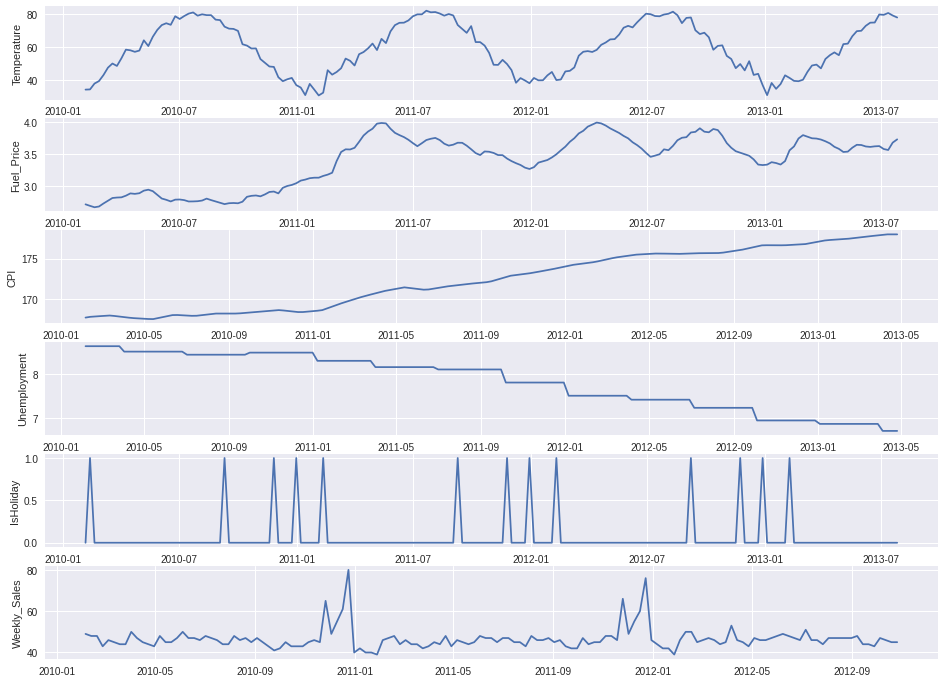

In [ ]:
# ploting timeseries for every features on cobined dataframe
fig = plt.figure(figsize=(16,12))
count_columns_ex_date = len(data_datewise_df.columns[1:])
for idx, col in enumerate(data_datewise_df.columns[1:]):
  plt.subplot(count_columns_ex_date, 1 , idx+1)
  plt.plot(data_datewise_df["Date"], data_datewise_df[col])
  plt.ylabel(col)


Text(0, 0.5, 'Weekly Sales in mio')

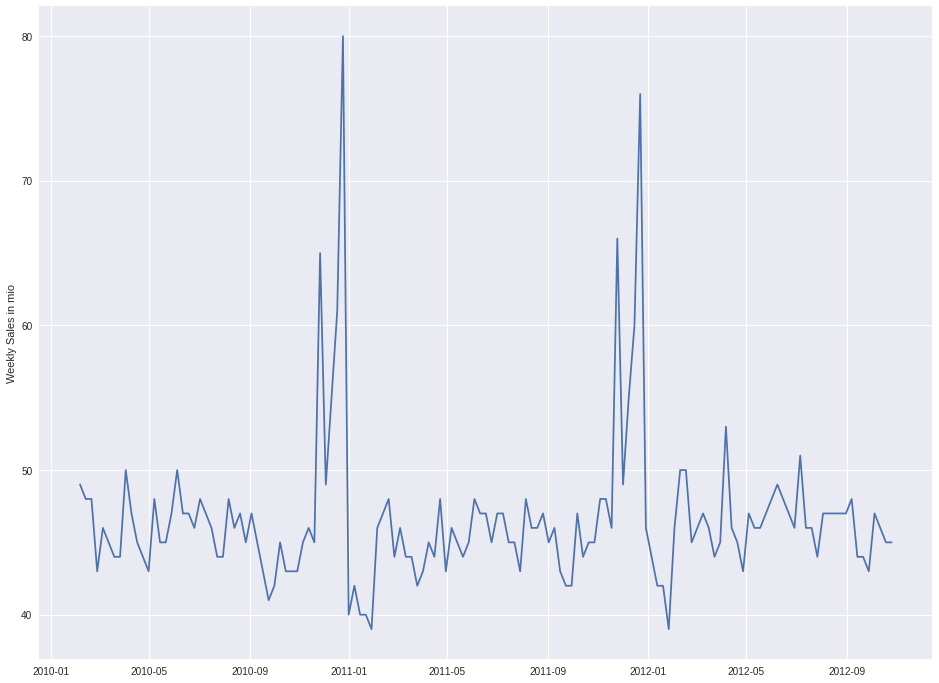

In [ ]:
fig = plt.figure(figsize = (16, 12))
plt.plot(data_datewise_df["Date"], data_datewise_df["Weekly_Sales"])
plt.ylabel("Weekly Sales in mio")

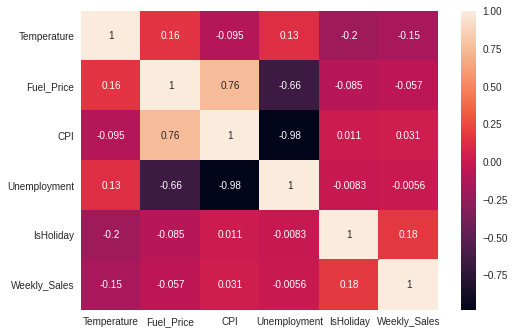

In [ ]:
# plot heatmap 
sns.heatmap(data_datewise_df.corr(), annot=True)

###**Analyze by Stores**

In [ ]:
sales_df_grouped = sales_df.groupby("Store").agg({"Weekly_Sales": "sum",
                                                 "IsHoliday": "min"})
data_storewise_df = pd.merge(stores_df, sales_df_grouped, on=["Store"], how="left")
data_storewise_df["Weekly_Sales"] = (data_storewise_df["Weekly_Sales"] / 1e6).astype(int)
data_storewise_df.head()

,Store,Type,Size,Weekly_Sales,IsHoliday
0,1,A,151315,222,False
1,2,A,202307,275,False
2,3,B,37392,57,False
3,4,A,205863,299,False
4,5,B,34875,45,False


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


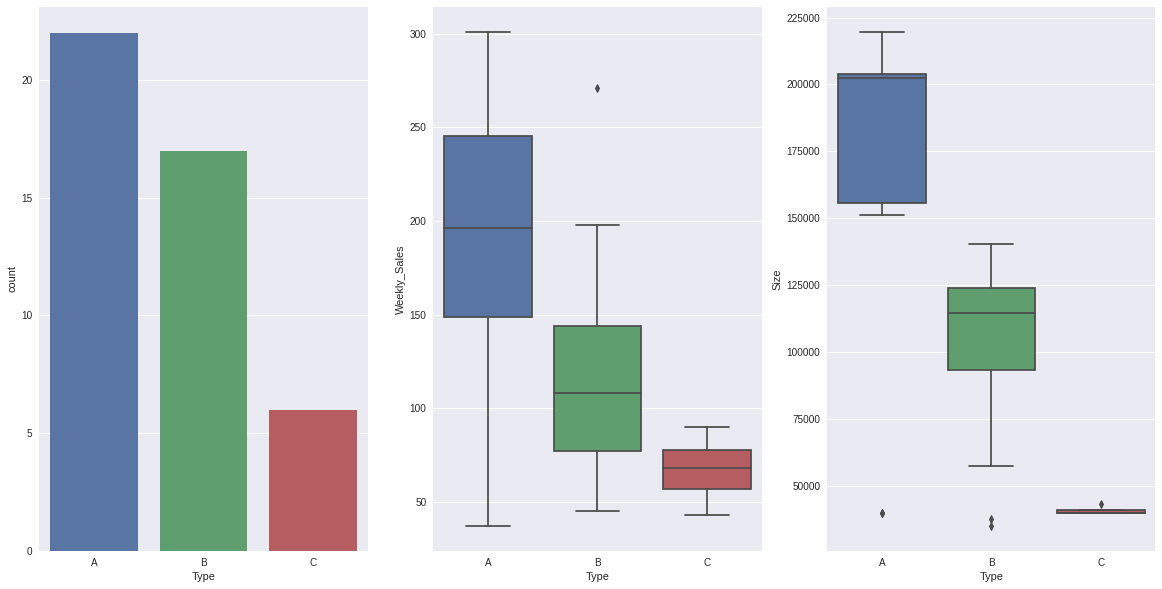

In [ ]:
# create histogram of weekly sales per store
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
sns.countplot(data_storewise_df["Type"], ax=ax1)
sns.boxplot(data=data_storewise_df, y="Weekly_Sales", x="Type", ax=ax2)
sns.boxplot(data=data_storewise_df, y="Size", x="Type", ax=ax3)

As we can see, store A are most common type, they have a highest median of weekly sales and they are a largest stores. So i can supose that weekkly sales is directly correlated to store size.

Text(0.5, 0, 'Store Number')

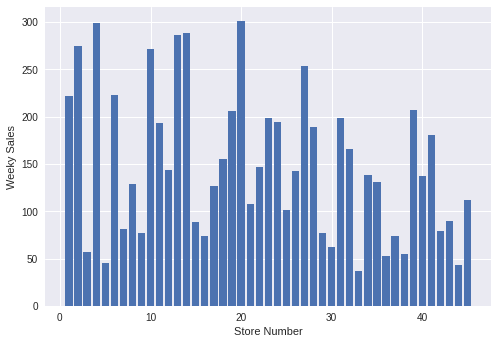

In [ ]:
# weekly sales per store
bins = np.arange(1, 46)
plt.bar(x=bins, height=data_storewise_df["Weekly_Sales"].to_numpy())
plt.ylabel("Weeky Sales")
plt.xlabel("Store Number")

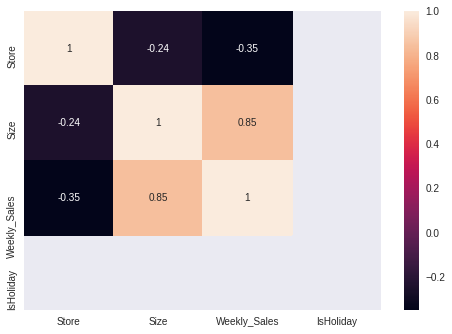

In [ ]:
sns.heatmap(data_storewise_df.corr(), annot=True)

##**Prepare Data**

### Create Final Combined Dataset

Now I combined datasets by date, in order to define one dataframe for selecting train, validation and test sets.

In [ ]:
temp_df = pd.merge(sales_df, features_df, on=['Store', 'Date', 'IsHoliday'], how='left')
data_df = pd.merge(stores_df, temp_df, on=['Store'], how='left')

In [ ]:
data_df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,A,151315,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,A,151315,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,A,151315,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,A,151315,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,A,151315,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [ ]:
num_samples, num_features = data_df.shape
print(f"The combined dataframe has {num_samples} samples and each sample has {num_features} features.")

The combined dataframe has 421570 samples and each sample has 16 features.


In [ ]:
# checking for null values
for col in data_df.columns:
  count_null = data_df[col].isnull().sum()
  print (f' Col: {col} har {count_null} null values.')

 Col: Store har 0 null values.
 Col: Type har 0 null values.
 Col: Size har 0 null values.
 Col: Dept har 0 null values.
 Col: Date har 0 null values.
 Col: Weekly_Sales har 0 null values.
 Col: IsHoliday har 0 null values.
 Col: Temperature har 0 null values.
 Col: Fuel_Price har 0 null values.
 Col: MarkDown1 har 270889 null values.
 Col: MarkDown2 har 310322 null values.
 Col: MarkDown3 har 284479 null values.
 Col: MarkDown4 har 286603 null values.
 Col: MarkDown5 har 270138 null values.
 Col: CPI har 0 null values.
 Col: Unemployment har 0 null values.


### Convert Column IsHoliday from Boolean to Integer

In [ ]:
data_df['IsHoliday'] = data_df['IsHoliday'].astype(int)

In [ ]:
data_df.dtypes

Store                    int64
Type                    object
Size                     int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
dtype: object

### Convert the Type Column to Categorical

In [ ]:
def convert_store_type(df):
    df_copy = df.copy()
    df_copy.loc[df_copy["Type"] == "A", "Type"] = 0
    df_copy.loc[df_copy["Type"] == "B", "Type"] = 1
    df_copy.loc[df_copy["Type"] == "C", "Type"] = 2
    df_copy["Type"] = df_copy["Type"].astype(int)
    return df_copy

In [ ]:
data_df = convert_store_type(data_df)

In [ ]:
data_df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,0,151315,1,2010-02-05,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,0,151315,1,2010-02-12,46039.49,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,0,151315,1,2010-02-19,41595.55,0,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,0,151315,1,2010-02-26,19403.54,0,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,0,151315,1,2010-03-05,21827.90,0,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


###Convert the Date Column to Separete Features

In [ ]:
# Date features method
def create_date_features(df, ts_col_name):
  '''
  Create and add new datetime relation features on 
  dataset. 
  '''
  df['month'] = df[ts_col_name].dt.month
  df['day_of_month'] = df[ts_col_name].dt.day
  df['day_of_year'] = df[ts_col_name].dt.dayofyear
  df['week_of_year'] = df[ts_col_name].dt.weekofyear
  df['day_of_week'] = df[ts_col_name].dt.dayofweek 
  df['year'] = df[ts_col_name].dt.year
  df["is_week_end"] = (df[ts_col_name].dt.weekday).astype(int)
  df["quarter"] = df[ts_col_name].dt.quarter
  df['is_month_start'] = df[ts_col_name].dt.is_month_start.astype(int)
  df['is_month_end'] = df[ts_col_name].dt.is_month_end.astype(int)
  df['is_quarter_start'] = df[ts_col_name].dt.is_quarter_start.astype(int)
  df['is_quarter_end'] = df[ts_col_name].dt.is_quarter_end.astype(int)
  df['is_year_start'] = df[ts_col_name].dt.is_year_start.astype(int)
  df['is_year_end'] = df[ts_col_name].dt.is_year_end.astype(int)
  return df

In [ ]:
data_df_copy = data_df
data_df_copy['Year'] = data_df_copy.Date.dt.year
data_df_copy['Week_of_Year'] = data_df_copy.Date.dt.weekofyear

# create data fearures on dataset
# data_df_copy = create_date_features(data_df,"Date")

# convert year, month and day to categorical values
data_df_converted = pd.get_dummies(data_df_copy, columns=["Year", "Week_of_Year"])

# remove column Date
data_df_converted.drop("Date", axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data_df_converted.head()

,Store,Type,Size,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year_2010,Year_2011,Year_2012,Week_of_Year_1,Week_of_Year_2,Week_of_Year_3,Week_of_Year_4,Week_of_Year_5,Week_of_Year_6,Week_of_Year_7,Week_of_Year_8,Week_of_Year_9,Week_of_Year_10,Week_of_Year_11,Week_of_Year_12,Week_of_Year_13,Week_of_Year_14,Week_of_Year_15,Week_of_Year_16,Week_of_Year_17,Week_of_Year_18,Week_of_Year_19,Week_of_Year_20,Week_of_Year_21,Week_of_Year_22,Week_of_Year_23,Week_of_Year_24,Week_of_Year_25,Week_of_Year_26,Week_of_Year_27,Week_of_Year_28,Week_of_Year_29,Week_of_Year_30,Week_of_Year_31,Week_of_Year_32,Week_of_Year_33,Week_of_Year_34,Week_of_Year_35,Week_of_Year_36,Week_of_Year_37,Week_of_Year_38,Week_of_Year_39,Week_of_Year_40,Week_of_Year_41,Week_of_Year_42,Week_of_Year_43,Week_of_Year_44,Week_of_Year_45,Week_of_Year_46,Week_of_Year_47,Week_of_Year_48,Week_of_Year_49,Week_of_Year_50,Week_of_Year_51,Week_of_Year_52
0,1,0,151315,1,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,151315,1,46039.49,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,151315,1,41595.55,0,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,151315,1,19403.54,0,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,151315,1,21827.90,0,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_df_converted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 70 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Store            421570 non-null  int64  
 1   Type             421570 non-null  int64  
 2   Size             421570 non-null  int64  
 3   Dept             421570 non-null  int64  
 4   Weekly_Sales     421570 non-null  float64
 5   IsHoliday        421570 non-null  int64  
 6   Temperature      421570 non-null  float64
 7   Fuel_Price       421570 non-null  float64
 8   MarkDown1        150681 non-null  float64
 9   MarkDown2        111248 non-null  float64
 10  MarkDown3        137091 non-null  float64
 11  MarkDown4        134967 non-null  float64
 12  MarkDown5        151432 non-null  float64
 13  CPI              421570 non-null  float64
 14  Unemployment     421570 non-null  float64
 15  Year_2010        421570 non-null  uint8  
 16  Year_2011        421570 non-null  uint

In [ ]:
num_samples, num_features = data_df_converted.shape
print(f"The converted dataframe has {num_samples} samples and each sample has {num_features} features.")

The converted dataframe has 421570 samples and each sample has 70 features.


In [ ]:
data_df_converted.describe()

,Store,Type,Size,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year_2010,Year_2011,Year_2012,Week_of_Year_1,Week_of_Year_2,Week_of_Year_3,Week_of_Year_4,Week_of_Year_5,Week_of_Year_6,Week_of_Year_7,Week_of_Year_8,Week_of_Year_9,Week_of_Year_10,Week_of_Year_11,Week_of_Year_12,Week_of_Year_13,Week_of_Year_14,Week_of_Year_15,Week_of_Year_16,Week_of_Year_17,Week_of_Year_18,Week_of_Year_19,Week_of_Year_20,Week_of_Year_21,Week_of_Year_22,Week_of_Year_23,Week_of_Year_24,Week_of_Year_25,Week_of_Year_26,Week_of_Year_27,Week_of_Year_28,Week_of_Year_29,Week_of_Year_30,Week_of_Year_31,Week_of_Year_32,Week_of_Year_33,Week_of_Year_34,Week_of_Year_35,Week_of_Year_36,Week_of_Year_37,Week_of_Year_38,Week_of_Year_39,Week_of_Year_40,Week_of_Year_41,Week_of_Year_42,Week_of_Year_43,Week_of_Year_44,Week_of_Year_45,Week_of_Year_46,Week_of_Year_47,Week_of_Year_48,Week_of_Year_49,Week_of_Year_50,Week_of_Year_51,Week_of_Year_52
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.00000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,0.589912,136727.915739,44.260317,15981.258123,0.070358,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,0.333703,0.364004,0.302294,0.014002,0.013981,0.013941,0.013927,0.021012,0.021100,0.021180,0.020979,0.021093,0.021093,0.021007,0.020993,0.021019,0.021038,0.021050,0.021024,0.020936,0.021019,0.021021,0.020874,0.020853,0.020815,0.020858,0.020936,0.020898,0.020829,0.020862,0.020820,0.020853,0.020801,0.020884,0.020839,0.020896,0.020896,0.020962,0.021019,0.020974,0.020988,0.020988,0.021040,0.021031,0.02096,0.021005,0.013957,0.013979,0.013941,0.014135,0.014097,0.014133,0.014166,0.014192,0.014104
std,12.785297,0.666337,60980.583328,30.492054,22711.183519,0.255750,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,0.471535,0.481150,0.459252,0.117501,0.117412,0.117245,0.117186,0.143424,0.143717,0.143985,0.143313,0.143693,0.143693,0.143408,0.143361,0.143448,0.143511,0.143551,0.143464,0.143170,0.143448,0.143456,0.142964,0.142892,0.142765,0.142908,0.143170,0.143043,0.142813,0.142924,0.142781,0.142892,0.142717,0.142996,0.142845,0.143035,0.143035,0.143258,0.143448,0.143297,0.143345,0.143345,0.143519,0.143487,0.14325,0.143400,0.117314,0.117402,0.117245,0.118049,0.117892,0.118039,0.118175,0.118283,0.117922
min,1.000000,0.000000,34875.000000,1.000000,-4988.940000,0.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,93638.000000,18.000000,2079.65

Standard deviation for the target feature is **22711.183519**.

###Use Iterative Imputer from SKlearn to Remove Missing Data

Cited from Scikit-Learn Documentation: 

> IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.


Use only the **training data** in order to fit the imputer and for validation and test data, the imputer should only be used in order to transform the features. In that way, data leakage shall be avoided.

In [ ]:
from sklearn.model_selection import train_test_split
# test = 10%
# train 70% de (100% - 10%)
# val 30% de (100% - 10%)
df_train, df_test = train_test_split(data_df_converted, test_size=0.10, random_state=42)
df_train, df_val = train_test_split(df_train, test_size=0.30, random_state=42)

In [ ]:
print(f"Shape of training data: {df_train.shape}")
print(f"Shape of testing data: {df_test.shape}")
print(f"Shape of validation data: {df_val.shape}")

Shape of training data: (265589, 70)
Shape of testing data: (42157, 70)
Shape of validation data: (113824, 70)


In [ ]:
df_train.head()

,Store,Type,Size,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year_2010,Year_2011,Year_2012,Week_of_Year_1,Week_of_Year_2,Week_of_Year_3,Week_of_Year_4,Week_of_Year_5,Week_of_Year_6,Week_of_Year_7,Week_of_Year_8,Week_of_Year_9,Week_of_Year_10,Week_of_Year_11,Week_of_Year_12,Week_of_Year_13,Week_of_Year_14,Week_of_Year_15,Week_of_Year_16,Week_of_Year_17,Week_of_Year_18,Week_of_Year_19,Week_of_Year_20,Week_of_Year_21,Week_of_Year_22,Week_of_Year_23,Week_of_Year_24,Week_of_Year_25,Week_of_Year_26,Week_of_Year_27,Week_of_Year_28,Week_of_Year_29,Week_of_Year_30,Week_of_Year_31,Week_of_Year_32,Week_of_Year_33,Week_of_Year_34,Week_of_Year_35,Week_of_Year_36,Week_of_Year_37,Week_of_Year_38,Week_of_Year_39,Week_of_Year_40,Week_of_Year_41,Week_of_Year_42,Week_of_Year_43,Week_of_Year_44,Week_of_Year_45,Week_of_Year_46,Week_of_Year_47,Week_of_Year_48,Week_of_Year_49,Week_of_Year_50,Week_of_Year_51,Week_of_Year_52
166177,17,1,93188,87,14449.35,0,45.29,3.734,8337.43,74.41,6.00,418.13,3444.54,130.967097,6.403,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
121255,13,0,219622,27,2764.94,0,33.80,3.080,6809.96,37106.52,179.77,1922.55,7481.58,130.157516,6.104,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
182670,19,0,203819,42,5912.38,0,30.68,3.811,NaN,NaN,NaN,NaN,NaN,134.068258,7.658,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
202745,21,1,140167,40,41350.89,0,71.64,3.285,NaN,NaN,NaN,NaN,NaN,216.695831,7.441,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
150145,16,1,57197,16,31783.13,0,65.43,3.741,3644.68,37.20,63.90,611.78,5520.95,197.655186,6.169,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=20,
                           random_state=42,
                           verbose=1)

imputer = imputer.fit(df_train[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']])


[IterativeImputer] Completing matrix with shape (265589, 5)
[IterativeImputer] Change: 6391.152478912651, scaled tolerance: 141.63061 
[IterativeImputer] Change: 489.8835417781561, scaled tolerance: 141.63061 
[IterativeImputer] Change: 193.14071873258376, scaled tolerance: 141.63061 
[IterativeImputer] Change: 132.70236516645218, scaled tolerance: 141.63061 
[IterativeImputer] Early stopping criterion reached.


In [ ]:
df_train_imputed = imputer.transform(df_train[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]])
df_test_imputed = imputer.transform(df_test[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]])
df_val_imputed = imputer.transform(df_val[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]])

[IterativeImputer] Completing matrix with shape (265589, 5)
[IterativeImputer] Completing matrix with shape (42157, 5)
[IterativeImputer] Completing matrix with shape (113824, 5)


In [ ]:
def add_new_markdown_cols(df_orig, data_df_imputed):
    df_new = df_orig.copy()
    df_new["MarkDown1"] = data_df_imputed[:, 0]
    df_new["MarkDown2"] = data_df_imputed[:, 1]
    df_new["MarkDown3"] = data_df_imputed[:, 2]
    df_new["MarkDown4"] = data_df_imputed[:, 3]
    df_new["MarkDown5"] = data_df_imputed[:, 4]
    
    return df_new

In [ ]:
# add new MarkDown data to dataframe
df_train = add_new_markdown_cols(df_train, df_train_imputed)
df_val = add_new_markdown_cols(df_val, df_val_imputed)
df_test = add_new_markdown_cols(df_test, df_test_imputed)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265589 entries, 166177 to 204287
Data columns (total 70 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Store            265589 non-null  int64  
 1   Type             265589 non-null  int64  
 2   Size             265589 non-null  int64  
 3   Dept             265589 non-null  int64  
 4   Weekly_Sales     265589 non-null  float64
 5   IsHoliday        265589 non-null  int64  
 6   Temperature      265589 non-null  float64
 7   Fuel_Price       265589 non-null  float64
 8   MarkDown1        265589 non-null  float64
 9   MarkDown2        265589 non-null  float64
 10  MarkDown3        265589 non-null  float64
 11  MarkDown4        265589 non-null  float64
 12  MarkDown5        265589 non-null  float64
 13  CPI              265589 non-null  float64
 14  Unemployment     265589 non-null  float64
 15  Year_2010        265589 non-null  uint8  
 16  Year_2011        265589 non-null 

In [ ]:
df_train.describe()

,Store,Type,Size,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year_2010,Year_2011,Year_2012,Week_of_Year_1,Week_of_Year_2,Week_of_Year_3,Week_of_Year_4,Week_of_Year_5,Week_of_Year_6,Week_of_Year_7,Week_of_Year_8,Week_of_Year_9,Week_of_Year_10,Week_of_Year_11,Week_of_Year_12,Week_of_Year_13,Week_of_Year_14,Week_of_Year_15,Week_of_Year_16,Week_of_Year_17,Week_of_Year_18,Week_of_Year_19,Week_of_Year_20,Week_of_Year_21,Week_of_Year_22,Week_of_Year_23,Week_of_Year_24,Week_of_Year_25,Week_of_Year_26,Week_of_Year_27,Week_of_Year_28,Week_of_Year_29,Week_of_Year_30,Week_of_Year_31,Week_of_Year_32,Week_of_Year_33,Week_of_Year_34,Week_of_Year_35,Week_of_Year_36,Week_of_Year_37,Week_of_Year_38,Week_of_Year_39,Week_of_Year_40,Week_of_Year_41,Week_of_Year_42,Week_of_Year_43,Week_of_Year_44,Week_of_Year_45,Week_of_Year_46,Week_of_Year_47,Week_of_Year_48,Week_of_Year_49,Week_of_Year_50,Week_of_Year_51,Week_of_Year_52
count,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.00000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000,265589.000000
mean,22.181845,0.589584,136733.654636,44.278573,15966.509698,0.070707,60.10157,3.360732,7247.188332,3323.626927,1479.815613,2881.138506,4636.143345,171.271230,7.962133,0.334227,0.363912,0.301861,0.014003,0.014071,0.013766,0.013954,0.021085,0.021345,0.021119,0.020588,0.020961,0.021063,0.021085,0.021232,0.021353,0.021270,0.021051,0.020953,0.021017,0.021100,0.021021,0.020686,0.020758,0.021006,0.020758,0.020569,0.021010,0.020769,0.020920,0.020660,0.020935,0.020656,0.020694,0.020882,0.020878,0.020795,0.020946,0.021100,0.021074,0.021225,0.020886,0.020946,0.021100,0.020856,0.021104,0.013867,0.014157,0.013879,0.014127,0.013943,0.014443,0.014108,0.014093,0.014135
std,12.790792,0.666081,60981.469398,30.475535,22667.312838,0.256335,18.42774,0.458687,4949.974137,4846.041844,5406.650260,3665.461523,3575.182597,39.175598,1.866678,0.471720,0.481125,0.459066,0.117502,0.117782,0.116517,0.117300,0.143669,0.144532,0.143782,0.142001,0.143254,0.143593,0.143669,0.144157,0.144557,0.144282,0.143556,0.143229,0.143443,0.143719,0.143455,0.142332,0.142572,0.143405,0.142572,0.141938,0.143417,0.142610,0.143115,0.142243,0.143166,0.142230,0.142357,0.142989,0.142977,0.142699,0.143204,0.143719,0.143631,0.144132,0.143002,0.143204,0.143719,0.142901,0.143731,0.116940,0.118139,0.116987,0.118015,0.117253,0.119310,0.117938,0.117876,0.118046
min,1.000000,0.000000,34875.000000,1.000000,-4988.940000,0.000000,-2.06000,2.472000,0.270000,-265.760000,-571.195433,-1672.645313,135.160000,126.064000,3.879000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,93638.000000,18.000000,20

###Split Data into X and y

In [ ]:
def get_X_and_Y(df):
    df_copy = df.copy()
    X = df_copy.drop("Weekly_Sales", axis=1, inplace=False).to_numpy()
    Y = df_copy["Weekly_Sales"].to_numpy()
    
    return X, Y

In [ ]:
features_list = list(df_train.drop("Weekly_Sales", axis=1, inplace=False).columns)
X_train, Y_train = get_X_and_Y(df_train)
X_val, Y_val = get_X_and_Y(df_val)
X_test, Y_test = get_X_and_Y(df_test)

In [ ]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of Y_val: {Y_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_test: {Y_test.shape}")
print(features_list)

Shape of X_train: (265589, 69)
Shape of Y_train: (265589,)
Shape of X_val: (113824, 69)
Shape of Y_val: (113824,)
Shape of X_test: (42157, 69)
Shape of Y_test: (42157,)
['Store', 'Type', 'Size', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Year_2010', 'Year_2011', 'Year_2012', 'Week_of_Year_1', 'Week_of_Year_2', 'Week_of_Year_3', 'Week_of_Year_4', 'Week_of_Year_5', 'Week_of_Year_6', 'Week_of_Year_7', 'Week_of_Year_8', 'Week_of_Year_9', 'Week_of_Year_10', 'Week_of_Year_11', 'Week_of_Year_12', 'Week_of_Year_13', 'Week_of_Year_14', 'Week_of_Year_15', 'Week_of_Year_16', 'Week_of_Year_17', 'Week_of_Year_18', 'Week_of_Year_19', 'Week_of_Year_20', 'Week_of_Year_21', 'Week_of_Year_22', 'Week_of_Year_23', 'Week_of_Year_24', 'Week_of_Year_25', 'Week_of_Year_26', 'Week_of_Year_27', 'Week_of_Year_28', 'Week_of_Year_29', 'Week_of_Year_30', 'Week_of_Year_31', 'Week_of_Year_32', 'Week_of_Year_33', 'Week_of_Y

###Check Features for Importance on Target

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# feature selection
def select_features(X_train, y_train, X_test):
  # configure to select all features
  fs = SelectKBest(score_func=f_regression, k='all')
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train imput data
  X_train_fs = fs.transform(X_train)
  # transform test imput data
  X_test_fs = fs.transform(X_test)

  return X_train_fs, X_test_fs, fs


In [ ]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
    print(f'Feature {features_list[i]}: {fs.scores_[i]}')

Feature Store: 1882.797368256616
Feature Type: 9205.90588365209
Feature Size: 16968.518222511484
Feature Dept: 5949.574485928215
Feature IsHoliday: 50.16165656921254
Feature Temperature: 4.350837941750428
Feature Fuel_Price: 0.07924397690672204
Feature MarkDown1: 755.1378216852344
Feature MarkDown2: 51.12197871133539
Feature MarkDown3: 246.01746643710217
Feature MarkDown4: 460.52415173214456
Feature MarkDown5: 904.0291341621162
Feature CPI: 157.05324363506784
Feature Unemployment: 175.01551338768695
Feature Year_2010: 20.423633457759767
Feature Year_2011: 0.5018714708026987
Feature Year_2012: 15.220059294461699
Feature Week_of_Year_1: 14.945722585463109
Feature Week_of_Year_2: 28.13093779556812
Feature Week_of_Year_3: 27.400959827862394
Feature Week_of_Year_4: 46.20032304038462
Feature Week_of_Year_5: 0.4452358611509398
Feature Week_of_Year_6: 2.8297539079303347
Feature Week_of_Year_7: 3.374325725885024
Feature Week_of_Year_8: 5.184903086394926
Feature Week_of_Year_9: 1.115363097847748

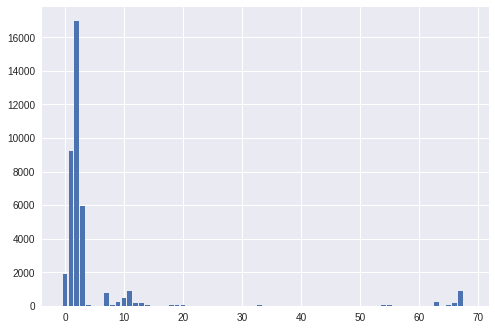

In [ ]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

###Store Data in CSV Files for Training and Testing

In [ ]:
def store_to_csv(X, Y, filename, path, store_target=True):
    '''
    This function takes to arrays (X and Y) as input and stores them as csv files.
    
    Args:
        X (np.ndarray): Sample data of shape (n_samples, n_features)
        Y (np.ndarray): Target data of shape (n_samples,)
        filename (string): The filename for the new csv file
        path (string): The path to the folder where the new csv file should be stored in
        store_target (boolean): Whether to also store the target variable in the csv file or not
    '''
    if not os.path.exists(path):
        os.makedirs(path)
    
    X_df = pd.DataFrame(X)
    
    if not store_target:
        pd.concat([X_df], axis=1).to_csv(os.path.join(path, filename), header=False, index=False)
    else:
        Y_df = pd.DataFrame(Y)
        pd.concat([Y_df, X_df], axis=1).to_csv(os.path.join(path, filename), header=False, index=False)
    
    print(f"The file {os.path.join(path, filename)} was created.")

In [ ]:
store_to_csv(X_train, Y_train, "train.csv", "data_converted", True)
store_to_csv(X_test, None, "test.csv", "data_converted", False)
store_to_csv(X_test, Y_test, "test_with_true_label.csv", "data_converted", True)
store_to_csv(X_val, Y_val, "val.csv", "data_converted", True)

The file data_converted/train.csv was created.
The file data_converted/test.csv was created.
The file data_converted/test_with_true_label.csv was created.
The file data_converted/val.csv was created.


In [ ]:
import csv
# store feature list as file for later usage
features_list_csv_filepath = "data_converted/features_list.csv"

with open(features_list_csv_filepath, "w+") as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(features_list)

## **Training and Model Selection**

In [ ]:
# set number of samples that shall be used for visualising test true data and predicted data
NUM_SAMPLES_TEST_VISUALIZATION = 100

In [ ]:
# the normalization factor is standard deviation from weekly sales 
normalization_factor = int(22711.183519)
print(f"Normalization factor: {normalization_factor}")

Normalization factor: 22711


In [ ]:
import os

# folder containing the training and test data
data_dir = "data_converted"

# read train, val and test datasets
train_data = pd.read_csv(os.path.join(data_dir, "train.csv"), header=None, names=None)
val_data = pd.read_csv(os.path.join(data_dir, "val.csv"), header=None, names=None)
# test_data = pd.read_csv(os.path.join(data_dir, "test.csv"), header=None, names=None)

# read in test data, assuming it is stored locally
test_data = pd.read_csv(os.path.join(data_dir, "test_with_true_label.csv"), header=None, names=None)


In [ ]:
# train data
train_y = train_data.iloc[:,0]
train_x = train_data.iloc[:,1:]

# val data
val_y = val_data.iloc[:,0]
val_x = val_data.iloc[:,1:]

In [ ]:
# labels are in the first column
test_y_true = test_data.iloc[:,0]
test_x = test_data.iloc[:,1:]

In [ ]:
train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
0,14449.35,17.0,1.0,93188.0,87.0,0.0,45.29,3.734,8337.430000,74.410000,6.000000,418.130000,3444.540000,130.967097,6.403,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2764.94,13.0,0.0,219622.0,27.0,0.0,33.80,3.080,6809.960000,37106.520000,179.770000,1922.550000,7481.580000,130.157516,6.104,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5912.38,19.0,0.0,203819.0,42.0,0.0,30.68,3.811,7247.188332,3323.626927,1479.815613,2881.138506,4636.143345,134.068258,7.658,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,41350.89,21.0,1.0,140167.0,40.0,0.0,71.64,3.285,7247.188332,3323.626927,1479.815613,2881.138506,4636.143345,216.695831,7.441,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,31783.13,16.0,1.0,57197.0,16.0,0.0,65.43,3.741,3644.680000,37.200000,63.900000,611.780000,5520.950000,197.655186,6.169,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265584,15833.56,18.0,1.0,120653.0,82.0,0.0,20.79,3.240,7247.188332,3323.626927,1479.815613,2881.138506,4636.143345,133.183419,9.131,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
265585,32580.10,27.0,0.0,204184.0,5.0,0.0,49.69,3.719,10710.560000,44021.610000,475.300000,4235.070000,4920.650000,140.411161,7.906,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
265586,12232.15,14.0,0.0,200898.0,55.0,0.0,35.78,3.274,7247.188332,3323.626927,1479.815613,2881.138506,4636.143345,184.162563,8.549,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
265587,1621.83,27.0,0.0,204184.0,41.0,0.0,76.87,3.886,7247.188332,3323.626927,1479.815613,2881.138506,4636.143345,139.544208,7.850,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train the Baseline Model

For a baseline model I will training a linear regression using SKlearn library.

In [ ]:
# list of model metric results
model_result = []

In [ ]:
# Treining a Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Evaluating eith MSE (Mean Squared Error) metric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

test_y_preds = lin_reg.predict(test_x.values)
rmse_linear_regression = mean_squared_error(test_y_true, test_y_preds, squared=False)
r2_linear_regression = r2_score(test_y_true, test_y_preds)

print(f'Normalized RMSE: {rmse_linear_regression/normalization_factor}')
print(f'R-Square Score: {r2_linear_regression}')

model_result.append(('Linear Regression', rmse_linear_regression/normalization_factor, r2_linear_regression))

Normalized RMSE: 0.9453467744242725
R-Square Score: 0.09123065397158103


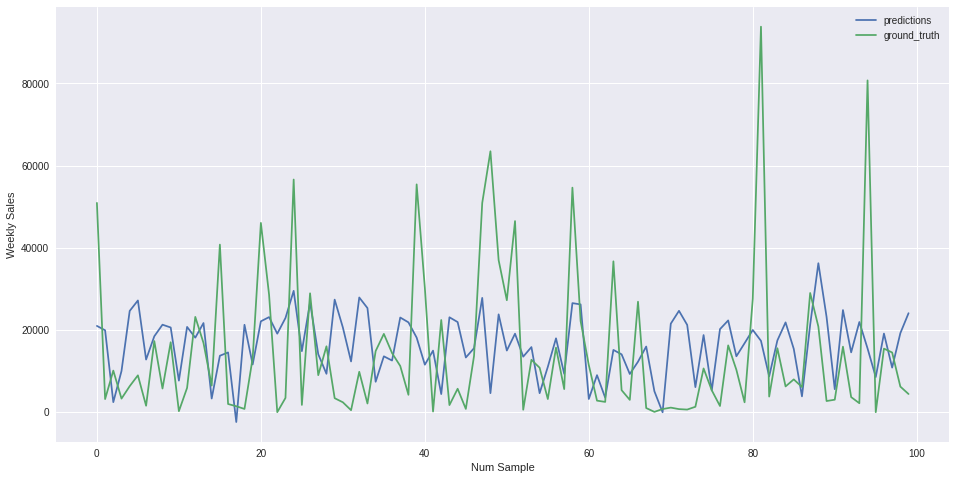

In [ ]:
# plot some results
num_samples_test = 100
fig = plt.figure(figsize=(16, 8))
plt.plot(test_y_preds[:NUM_SAMPLES_TEST_VISUALIZATION])
plt.plot(test_y_true[:NUM_SAMPLES_TEST_VISUALIZATION])
plt.legend(("predictions", "ground_truth"))
plt.ylabel("Weekly Sales")
plt.xlabel("Num Sample")
plt.show()

As we can see, the predictor line dosn't fit very well with true line but for this model can be used as my baseline.

### Train Desision Tree Regressor

Training a Ddecicion Tree Regressor model using cros valitarion strategy.

In [ ]:
# Train Desision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

dec_tree = DecisionTreeRegressor(random_state=0)
dec_tree.fit(train_x, train_y)
#cross_val_score(dec_tree, train_x, train_y, cv=10)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
test_y_preds = dec_tree.predict(test_x.values)
rmse_dec_tree = mean_squared_error(test_y_true, test_y_preds, squared=False)
r2_dec_tree = r2_score(test_y_true, test_y_preds)
print(f"Normalized RMSE: {rmse_dec_tree/normalization_factor}")
print(f"R-Squared Score: {r2_dec_tree}")
model_result.append(('Decision Tree Regression', rmse_dec_tree/normalization_factor, r2_dec_tree))

Normalized RMSE: 0.22932285085478646
R-Squared Score: 0.9465231226065389


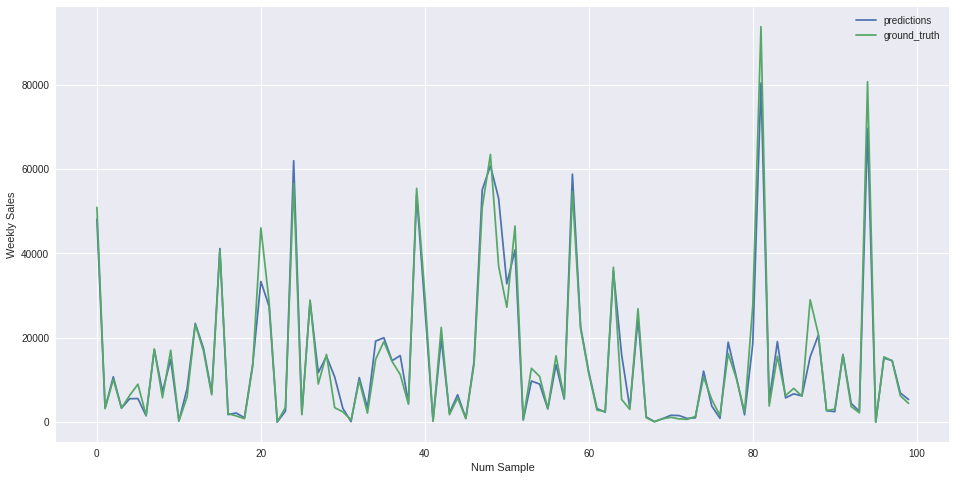

In [ ]:
# plot some results
fig = plt.figure(figsize=(16, 8))
plt.plot(test_y_preds[:NUM_SAMPLES_TEST_VISUALIZATION])
plt.plot(test_y_true[:NUM_SAMPLES_TEST_VISUALIZATION])
plt.legend(("predictions", "ground_truth"))
plt.ylabel("Weekly Sales")
plt.xlabel("Num Sample")
plt.show()

###Training Random Forest Rregressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rand_forest = RandomForestRegressor(random_state=0)
rand_forest.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
test_y_preds = rand_forest.predict(test_x.values)
rmse_rand_forest = mean_squared_error(test_y_true, test_y_preds, squared=False)
r2_rand_forest = r2_score(test_y_true, test_y_preds)
print(f"Normalized RMSE: {rmse_rand_forest/normalization_factor}")
print(f"R-Squared Score: {r2_rand_forest}")
model_result.append(('Random Forest Regression', rmse_rand_forest/normalization_factor, r2_rand_forest))

Normalized RMSE: 0.170440927080608
R-Squared Score: 0.9704594109206816


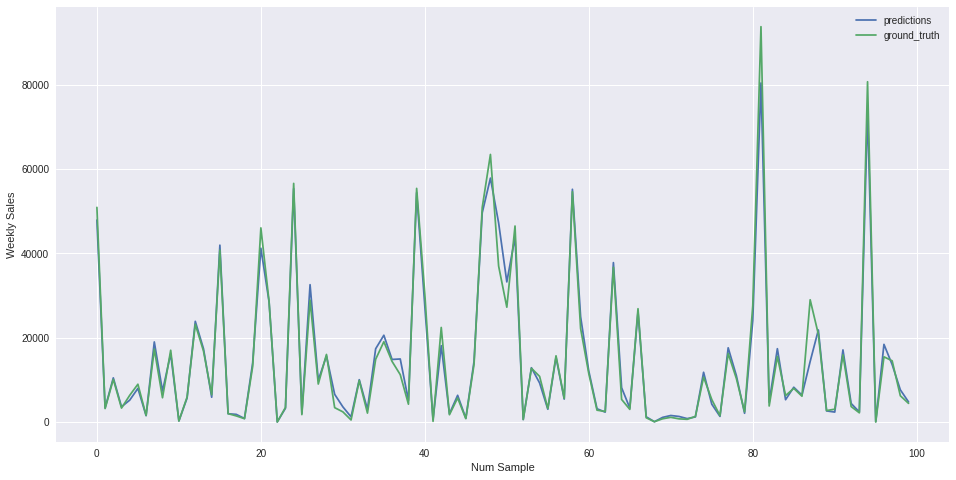

In [ ]:
# plot some results
fig = plt.figure(figsize=(16, 8))
plt.plot(test_y_preds[:NUM_SAMPLES_TEST_VISUALIZATION])
plt.plot(test_y_true[:NUM_SAMPLES_TEST_VISUALIZATION])
plt.legend(("predictions", "ground_truth"))
plt.ylabel("Weekly Sales")
plt.xlabel("Num Sample")
plt.show()

###Training XGBoost Regressor

In [ ]:
# import native xgboost
import xgboost as xg
from xgboost import XGBRegressor

In [ ]:
%%time

# Train with XGBoost navite api
# Train and test set are converted to DMatrix objects, 
# as it is required by learning API. 
train_dmatrix = xg.DMatrix(data = train_x, label = train_y) 
test_dmatrix = xg.DMatrix(data = test_x, label = test_y_true)

# features = df[feature_columns]
# target = df[target_columns]
# dmatrix = xg.DMatrix(features.values,
#                      target.values,
#                      feature_names=features.columns.values)
# clf = xg.train(params, dmatrix)

# Parameter dictionary specifying base learner 
param = {"objective":'reg:squarederror',
         "subsample": 0.8,
         "colsample_bytree": 0.4,
         "num_boost_round": 300,
         } 

xgb_reg = xg.train(params=param, 
                   dtrain=train_dmatrix, # aqui usado DMatrix
                   num_boost_round=300) # same as num_estimators on XGBRegressor

CPU times: user 2min 56s, sys: 270 ms, total: 2min 56s
Wall time: 1min 29s


In [ ]:
test_y_preds = xgb_reg.predict(test_dmatrix)
rmse_xgb = mean_squared_error(test_y_true, test_y_preds, squared=False)
r2_xgb = r2_score(test_y_true, test_y_preds)
print(f"Normalized RMSE: {rmse_xgb/normalization_factor}")
print(f"R-Squared Score: {r2_xgb}")
model_result.append(('XGBoost Regression', rmse_xgb/normalization_factor, r2_xgb))

Normalized RMSE: 0.2532793703679722
R-Squared Score: 0.9347664502582026


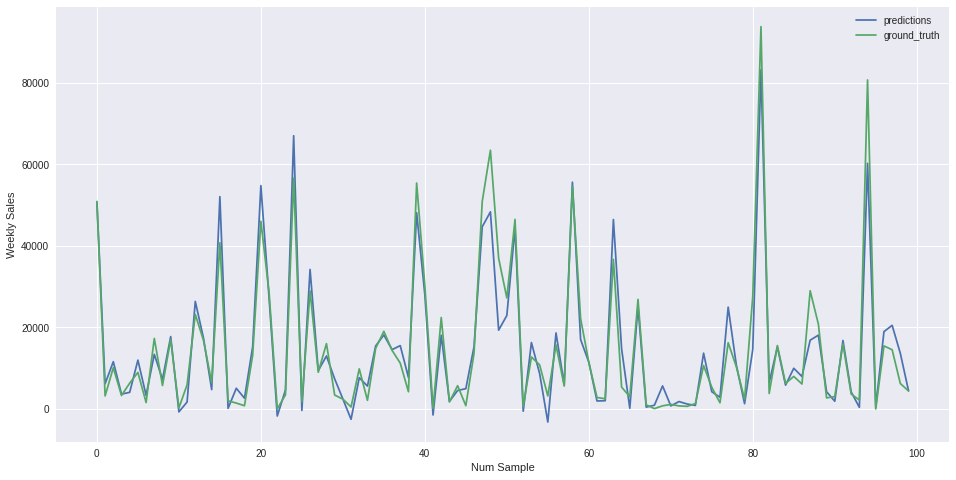

In [ ]:
# plot some results
fig = plt.figure(figsize=(16, 8))
plt.plot(test_y_preds[:NUM_SAMPLES_TEST_VISUALIZATION])
plt.plot(test_y_true[:NUM_SAMPLES_TEST_VISUALIZATION])
plt.legend(("predictions", "ground_truth"))
plt.ylabel("Weekly Sales")
plt.xlabel("Num Sample")
plt.show()

**XGBoost with SKLearn**

In [ ]:
%%time
# training with cross validation
from sklearn.model_selection import KFold

# set seed for reproducibility
RANDOMSTATE = 42
np.random.seed(RANDOMSTATE)

# always use same k-folds for reproducibility
kfolds = KFold(n_splits=10, shuffle=True, random_state=RANDOMSTATE)

paramns = {"subsample": 0.8,
           "colsample_bytree": 0.4,
           "num_estimators": 100,
           "max_depth": 10,
           "min_child_weight":10,
           "learning_rate": 0.3} 

xgb = XGBRegressor(
        objective='reg:squarederror',
        n_jobs=-1,
        random_state=RANDOMSTATE,
        booster='gbtree',   
        scale_pos_weight=1, 
        **paramns,
    )
    
xgb.fit(train_x, train_y) # eval_metric = rmse

CPU times: user 1min 39s, sys: 149 ms, total: 1min 40s
Wall time: 50.8 s


In [ ]:
test_y_preds = xgb.predict(test_x)
rmse_xgb = mean_squared_error(test_y_true, test_y_preds, squared=False)
r2_xgb = r2_score(test_y_true, test_y_preds)
print(f"Normalized RMSE: {rmse_xgb/normalization_factor}")
print(f"R-Squared Score: {r2_xgb}")
model_result.append(('XGBoost Cross Validation Regression', rmse_xgb/normalization_factor, r2_xgb))

Normalized RMSE: 0.21721852513807985
R-Squared Score: 0.9520194637934853


**Analyzing Model Metrics**

In [ ]:
# list metrics for models
pd.DataFrame(model_result, columns=['Model','Normalized RMSE','R2-Squared Score'])

,Model,Normalized RMSE,R2-Squared Score
0,Linear Regression,0.945347,0.091231
1,Decision Tree Regression,0.229323,0.946523
2,Decision Tree Regression,0.170441,0.970459
3,XGBoost Regression,0.253279,0.934766
4,XGBoost Cross Validation Regression,0.217219,0.952019


###XGBoost Hyperparameter Optimization - RandonSearchCV

In the last session I trained some models to compare performance against baseline. The best results come from XGBoost model. Now I will do a hyperparameter optmizations in order to get even bether results from XGBoost model.

In [ ]:
# A parameter search space for XGBoost
params = {
        # 'learning_rate': [0.02, 0.1], 
        'n_estimators': [100, 200, 500], 
        'alpha': [0, 1000],
        'eta': [0.1, 0.5],
        # 'gamma': [0.5, 1, 1.5, 2, 5],
        # 'lambda': [0,100],
        'max_delta_step': [0,10],
        'max_depth': [5, 7, 10],
        'min_child_weight': [1, 5, 10],
        'subsample': [0.6, 0.8, 1.0],
        'num_round': [50, 200, 500],
        'colsample_bytree': [0.6, 0.8, 1.0],
        }

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

folds = 10
param_comb = 5

xgb = xg.XGBRegressor(objective='reg:squarederror')

skf = StratifiedKFold(n_splits=folds, 
                      shuffle = True, 
                      random_state = 1001)

xgb_random_search = RandomizedSearchCV(xgb, 
                                   param_distributions=params, 
                                   n_iter=param_comb, 
                                   scoring='neg_root_mean_squared_error', 
                                   n_jobs=3, 
                                   cv=5, #skf.split(train_x, test_x), 
                                   verbose=3, 
                                   random_state=1001)


In [ ]:
%%time

# Fit search space
xgb_random_search.fit(train_x, train_y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  25 out of  25 | elapsed: 33.2min finished


CPU times: user 2min 51s, sys: 1.98 s, total: 2min 53s
Wall time: 35min 52s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:squarederror',
                                          random_state=0, reg_...
                   param_distributions={'alpha': [0, 1000],
                                        'colsample_bytree': [0.6, 0.8, 1.0],
                                        'eta': [0.1

In [ ]:
# show best parameters
xgb_random_search.best_params_ 

{'alpha': 0,
 'colsample_bytree': 0.6,
 'eta': 0.1,
 'max_delta_step': 0,
 'max_depth': 10,
 'min_child_weight': 10,
 'n_estimators': 200,
 'num_round': 50,
 'subsample': 1.0}

In [ ]:
xgb_random_search.best_estimator_

XGBRegressor(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, eta=0.1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=10, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, num_round=50, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1.0, verbosity=1)

**Training Final Model**

In [ ]:
%%time
# Trianinh final model
xgb_reg_final = xg.XGBRegressor(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
                                colsample_bynode=1, colsample_bytree=0.6, eta=0.1, gamma=0,
                                importance_type='gain', learning_rate=0.1, max_delta_step=0,
                                max_depth=10, min_child_weight=10, missing=None, n_estimators=200,
                                n_jobs=1, nthread=None, num_round=50, objective='reg:squarederror',
                                random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                                seed=None, silent=None, subsample=1.0, verbosity=1)

xgb_reg_final.fit(train_x, train_y)


CPU times: user 2min 39s, sys: 452 ms, total: 2min 40s
Wall time: 2min 39s


In [ ]:
test_y_preds = xgb_reg_final.predict(test_x)
rmse_xgb = mean_squared_error(test_y_true, test_y_preds, squared=False)
r2_xgb = r2_score(test_y_true, test_y_preds)
print(f"Normalized RMSE: {rmse_xgb/normalization_factor}")
print(f"R-Squared Score: {r2_xgb}")
model_result.append(('XGBoost Regression Hyperparameters Optimazed', rmse_xgb/normalization_factor, r2_xgb))

Normalized RMSE: 0.1968826363840144
R-Squared Score: 0.9605827603029425


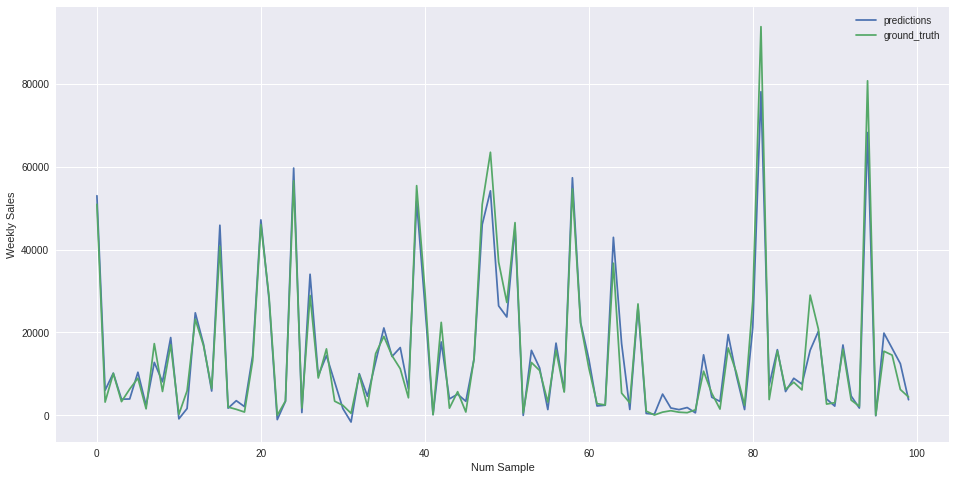

In [ ]:
# plot some results
fig = plt.figure(figsize=(16, 8))
plt.plot(test_y_preds[:NUM_SAMPLES_TEST_VISUALIZATION])
plt.plot(test_y_true[:NUM_SAMPLES_TEST_VISUALIZATION])
plt.legend(("predictions", "ground_truth"))
plt.ylabel("Weekly Sales")
plt.xlabel("Num Sample")
plt.show()

In [ ]:
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["auc","error"]
%time model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)


**Final Model Evaluation**

In [ ]:
# list metrics for models
pd.DataFrame(model_result, columns=['Model','Normalized RMSE','R2-Squared Score'])

,Model,Normalized RMSE,R2-Squared Score
0,Linear Regression,0.945347,0.091231
1,Decision Tree Regression,0.229323,0.946523
2,Decision Tree Regression,0.170441,0.970459
3,XGBoost Regression,0.253279,0.934766
4,XGBoost Cross Validation Regression,0.217219,0.952019
5,XGBoost Regression Hyperparameters Optimazed,0.196883,0.960583


Alter the hyperparameter tunning, XGBoost model have a incrment in performance, Normalized RMSE down to 0.1968 and R-Squared score achive 96,05%, with means that the final model can represent 96,05% of the variance given in the test data set. 

When taking a look at the results, one can see a large improvement comparing final XGboost model with the baseline. the normalized RMSE is five time smaller and R2 score is ten time larger than the first model but it's necessary to evaluete the impact of 19% of RMSE metric on production enviroment, becose in term of weekly sales, the range of sales is with minimum sales at -4989 and the maximum at 693099.4. One still has to take a look at the potencial outliers in the dataset.  


**Saving Final Model**

In [ ]:
xgb_reg_final.save_model('./retail-xgb-model.bin')

In [ ]:
# best parameters
#subsample = 0.8
#colsample_bytree = 1.0